In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df = pd.read_csv('dataset/uber.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.shape

(1156, 7)

In [4]:
df.isnull().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df[df.duplicated()]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
492,6/28/2016 23:34,6/28/2016 23:59,Business,Durham,Cary,9.9,Meeting


In [6]:
df.drop_duplicates(inplace=True)

In [7]:
# 4 trips have starting and end-time exactly equal i.e. zero trip time
df.drop(df.index[[751, 761, 798, 807]], inplace=True)

In [8]:
df.columns = ['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES', 'PURPOSE']

In [9]:
df['START_DATE'] = pd.to_datetime(df['START_DATE'], errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1151 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1150 non-null   datetime64[ns]
 1   END_DATE    1150 non-null   datetime64[ns]
 2   CATEGORY    1150 non-null   object        
 3   START       1150 non-null   object        
 4   STOP        1150 non-null   object        
 5   MILES       1151 non-null   float64       
 6   PURPOSE     652 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 71.9+ KB


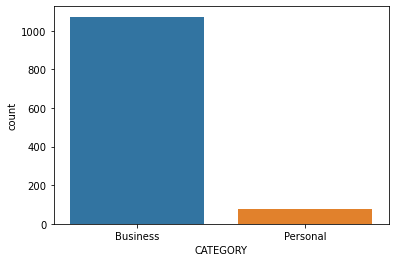

In [11]:
sns.countplot(x=df['CATEGORY']);

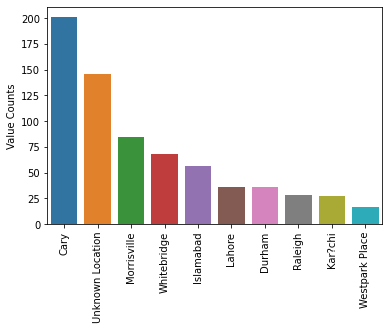

In [12]:
start_labels = df.START.value_counts().nlargest(10)
sns.barplot(x=start_labels.index, y=start_labels);
plt.ylabel('Value Counts');
plt.xticks(rotation=90);

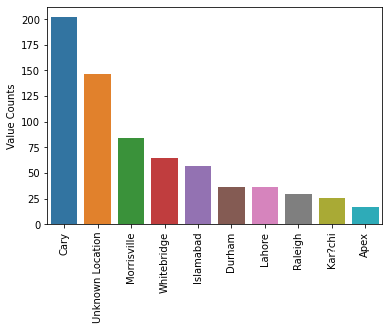

In [13]:
stop_labels = df.STOP.value_counts().nlargest(10)
sns.barplot(x=stop_labels.index, y=stop_labels);
plt.ylabel('Value Counts');
plt.xticks(rotation=90);

In [14]:
df['MONTH'] = pd.DatetimeIndex(df['START_DATE']).month

In [15]:
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April', 5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug', 9.0: 'Sep',
      10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec' }
df["MONTH"] = df.MONTH.map(month_label)

In [16]:
df.MONTH.unique()

array(['Jan', 'Feb', 'Mar', 'April', 'May', 'June', 'July', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', nan], dtype=object)

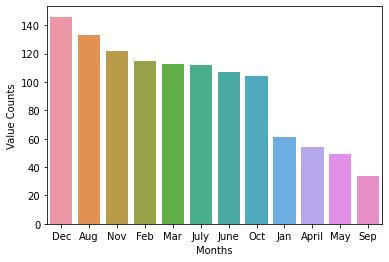

In [17]:
month_count = df.MONTH.value_counts()
sns.barplot(x=month_count.index, y=month_count);
plt.xlabel('Months')
plt.ylabel('Value Counts');

In [18]:
miles_dic = {}
for i in df.MILES:
    if i < 10:
        if '0-10 miles' not in miles_dic:
            miles_dic['0-10 miles'] = [i]
        else:
            miles_dic['0-10 miles'].append(i)
            
    elif i >= 10 and i < 20:
        if '10-20 miles' not in miles_dic:
            miles_dic['10-20 miles'] = [i]
        else:
            miles_dic['10-20 miles'].append(i)
            
    elif i >= 20 and i < 30:
        if '20-30 miles' not in miles_dic:
            miles_dic['20-30 miles'] = [i]
        else:
            miles_dic['20-30 miles'].append(i)
            
    elif i >= 30 and i < 40:
        if '30-40 miles' not in miles_dic:
            miles_dic['30-40 miles'] = [i]
        else:
            miles_dic['30-40 miles'].append(i)
            
    elif i >= 40 and i < 50:
        if '40-50 miles' not in miles_dic:
            miles_dic['40-50 miles'] = [i]
        else:
            miles_dic['40-50 miles'].append(i)
    else:
        if 'Above 50 miles' not in miles_dic:
            miles_dic['Above 50 miles'] = [i]
        else:
            miles_dic['Above 50 miles'].append(i)

In [19]:
len_miles = []
for key in miles_dic:
    len_miles.append((key, len(miles_dic[key])))

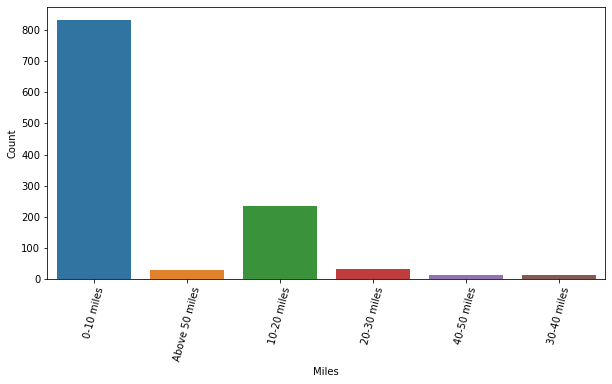

In [20]:
a, b = [], []
for i, j in len_miles:
    a.append(i)
    b.append(j)
plt.figure(figsize=(10, 5))
plt.xticks(rotation=75)
sns.barplot(x=a, y=b)
plt.xlabel('Miles')
plt.ylabel('Count');

In [21]:
df['DAY'] = df.START_DATE.dt.weekday

In [22]:
day_label = {
    0: 'Mon', 1: 'Tues', 2: 'Wed', 3: 'Thus', 4: 'Fri', 5: 'Sat', 6: 'Sun'
}
df['DAY'] = df['DAY'].map(day_label)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


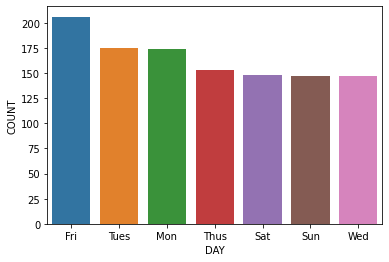

In [23]:
day_label = df.DAY.value_counts()
sns.barplot(day_label.index, day_label);
plt.xlabel('DAY')
plt.ylabel('COUNT');

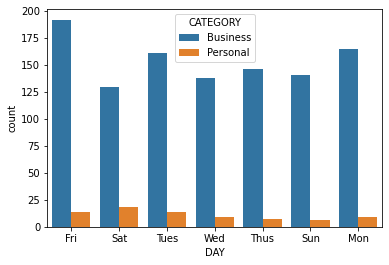

In [24]:
sns.countplot(hue='CATEGORY', x='DAY', data=df);